In [1]:
#install.packages(c('DHARMa'), repos='http://cran.us.r-project.org')
#install.packages("")
#install.packages(c('rJava'))
#install_github("timnewbold/StatisticalModels")

In [2]:
library(devtools)
library(ggplot2)       ## for pretty plots generally
## ggplot customization:
theme_set(theme_bw())
options(repr.plot.width=20, repr.plot.height=8)
library(ggthemes)
library(nlme)
#library(foreign)
library(pscl); library(ggplot2)
#library(bbmle)
#library(coefplot2)
#library(glmmADMB)
library(ggplot2)
require(gridExtra)
#install.packages("extrafont")
#library(extrafont)
library(lme4)
#library(MCMCglmm)
#library(blme)
library(MASS)          ## for glmmPQL
library(nlme)          ## for intervals(), tundra example
#library(coefplot2) ## coefficient plots
library(reshape2)
library(plyr)
#library(ggeffects)
require(ggplot2)
require(GGally)
require(reshape2)
require(lme4)
require(compiler)
require(parallel)
require(boot)
require(lattice)
library(GGally)

Warning message:
"package 'devtools' was built under R version 3.6.3"Loading required package: usethis
Warning message:
"package 'usethis' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'ggthemes' was built under R version 3.6.3"Warning message:
"package 'nlme' was built under R version 3.6.3"Warning message:
"package 'pscl' was built under R version 3.6.3"Classes and Methods for R developed in the
Political Science Computational Laboratory
Department of Political Science
Stanford University
Simon Jackman
hurdle and zeroinfl functions by Achim Zeileis
Loading required package: gridExtra
Warning message:
"package 'gridExtra' was built under R version 3.6.3"Warning message:
"package 'lme4' was built under R version 3.6.3"Loading required package: Matrix
Warning message:
"package 'Matrix' was built under R version 3.6.3"
Attaching package: 'lme4'

The following object is masked from 'package:nlme':

    lmList


In [3]:
data = read.csv('C:/Users/Falco/Desktop/directory/Humminbird_rescue/data/Model_data.csv')
data = data

In [4]:
table(data$season)


  Fall Spring Summer Winter 
   602   3138   2136   1032 

In [6]:
table(data$Species)


           ANHU            BCHU Non-selasphorus     Selasphorus 
           4322              47            1354            1185 

In [7]:
table(data$G_O)


Non-selasphorus spp.     Selasphorus spp. 
                5723                 1185 

In [8]:
table(data$r)


caught by domestic animal              found inside       found on the ground 
                      893                       221                      2950 
             nest-related suspect torpor-like state                   unknown 
                      943                       135                      1103 
               window hit 
                      663 

data <- within(data, {
  Disposition_binary <- factor(Disposition_binary, levels = 0:1, labels = c("Released", "Died"))
    Place <- factor(Place)
    F_Aid <- factor(F_Aid, levels = 0:1, labels = c("No", "Yes"))
    Sex <- factor(Sex)
    Age <- factor(Age)
    season <- factor(season)
    Species <- factor(Species)
    
})

In [9]:
data$Sex_e <- factor(data$Sex_e, levels = c("unknown", "Female-like ", "Male"))
str(data$Sex_e)

 Factor w/ 3 levels "unknown","Female-like ",..: 2 2 2 2 2 2 2 2 2 2 ...


In [10]:
data$r <- factor(data$r, levels = c("unknown", "caught by domestic animal", "window hit", "found inside",  "found on the ground", "nest-related", "suspect torpor-like state"))
str(data$r)

 Factor w/ 7 levels "unknown","caught by domestic animal",..: 5 1 7 1 2 5 3 3 5 1 ...


In [11]:
table(data$r)


                  unknown caught by domestic animal                window hit 
                     1103                       893                       663 
             found inside       found on the ground              nest-related 
                      221                      2950                       943 
suspect torpor-like state 
                      135 

In [12]:
data$r = relevel(data$r, ref=1)

In [13]:
str(data$r)

 Factor w/ 7 levels "unknown","caught by domestic animal",..: 5 1 7 1 2 5 3 3 5 1 ...


In [14]:
table(data$r)


                  unknown caught by domestic animal                window hit 
                     1103                       893                       663 
             found inside       found on the ground              nest-related 
                      221                      2950                       943 
suspect torpor-like state 
                      135 

## GlmmTMB

In [15]:
library(glmmTMB)
library(oddsratio)
library(sjPlot)

Warning message:
"package 'glmmTMB' was built under R version 3.6.3"Warning message:
"package 'oddsratio' was built under R version 3.6.3"Warning message:
"package 'sjPlot' was built under R version 3.6.3"Install package "strengejacke" from GitHub (`devtools::install_github("strengejacke/strengejacke")`) to load all sj-packages at once!


### species as random effects

In [16]:
m1 <- glmmTMB(Disposition_binary ~ Sex_e +  
            (1|G_O), family="binomial", data)#control = glmerControl(optimizer = "bobyqa"),


In [17]:
m2 <- glmmTMB(Disposition_binary ~ Sex_e +  Age_e +
            (1|G_O), family="binomial", data)#control = glmerControl(optimizer = "bobyqa"),

Warning message in fitTMB(TMBStruc):
"Model convergence problem; extreme or very small eigen values detected. See vignette('troubleshooting')"

In [18]:
m3 <- glmmTMB(Disposition_binary ~ Sex_e +  Age_e +  season+ 
            (1|G_O), family="binomial", data)#control = glmerControl(optimizer = "bobyqa"),

In [19]:
m4 <- glmmTMB(Disposition_binary ~ Sex_e + Age_e + season + F_Aid +
            (1|G_O), family="binomial", data)#control = glmerControl(optimizer = "bobyqa"),

In [20]:
m5 <- glmmTMB(Disposition_binary ~ Sex_e + Age_e + season + F_Aid + r +
            (1|G_O), family="binomial", data)#control = glmerControl(optimizer = "bobyqa"),

In [21]:
model_inter_sex_season <- glmmTMB(Disposition_binary ~ Sex_e +  Age_e + season + F_Aid + r +Sex_e*season +(1|G_O), 
                family="binomial", data) #, control = glmerControl(optimizer = "bobyqa")

In [22]:
model_inter_season <- glmmTMB(Disposition_binary ~ Sex_e +  
                Age_e + season + F_Aid + r +Age_e*season +(1|G_O), 
                family="binomial", data) #, control = glmerControl(optimizer = "bobyqa")


In [23]:
model_inter_Aid_Age <- glmmTMB(Disposition_binary ~ Sex_e +  
                Age_e + season + F_Aid + r +Age_e*F_Aid +(1|G_O), 
                family="binomial", data) #, control = glmerControl(optimizer = "bobyqa")

In [24]:
tab_model(m1, m2, m3, m4, m5, model_inter_sex_season, model_inter_season, model_inter_Aid_Age)

###  age and species as random effects 

In [25]:
m1_ref <- glmmTMB(Disposition_binary ~ Sex_e +  
            (1|G_O)+ (1 | Age_e), family="binomial", data)#control = glmerControl(optimizer = "bobyqa"),

In [26]:
m2_ref <- glmmTMB(Disposition_binary ~ Sex_e +   season+ 
            (1|G_O)+ (1 | Age_e), family="binomial", data)#control = glmerControl(optimizer = "bobyqa"),


In [27]:
m3_ref <- glmmTMB(Disposition_binary ~ Sex_e + season + F_Aid +
            (1|G_O)+ (1 | Age_e), family="binomial", data)#control = glmerControl(optimizer = "bobyqa"),

In [28]:
m4_ref <- glmmTMB(Disposition_binary ~ Sex_e + season + F_Aid + r +
            (1|G_O)+ (1 | Age_e), family="binomial", data)#control = glmerControl(optimizer = "bobyqa"),


In [29]:
model_inter_sex_season_ref <- glmmTMB(Disposition_binary ~ Sex_e + season + F_Aid + r +Sex_e*season +(1|G_O)+ (1 | Age_e), 
                family="binomial", data) #, control = glmerControl(optimizer = "bobyqa")

In [30]:
model_inter_sex_season_ref <- glmmTMB(Disposition_binary ~ Sex_e + season + F_Aid + r +Sex_e*season +(1|G_O)+ (1 | Age_e), 
                family="binomial", data) #, control = glmerControl(optimizer = "bobyqa")

model_inter_season_ref <- glmmTMB(Disposition_binary ~ Sex_e +  
                + season + F_Aid + r +Age_e*season +(1|G_O)+ (1 | Age_e), 
                family="binomial", data) #, control = glmerControl(optimizer = "bobyqa")

model_inter_Aid_Age_ref <- glmmTMB(Disposition_binary ~ Sex_e +  
                season + F_Aid + r +Age_e*F_Aid +(1|G_O)+ (1 | Age_e), 
                family="binomial", data) # control = glmerControl(optimizer = "bobyqa")

Warning message in fitTMB(TMBStruc):
"Model convergence problem; non-positive-definite Hessian matrix. See vignette('troubleshooting')"Warning message in fitTMB(TMBStruc):
"Model convergence problem; non-positive-definite Hessian matrix. See vignette('troubleshooting')"

In [31]:
tab_model(m1_ref, m2_ref, m3_ref, m4_ref, model_inter_sex_season_ref, model_inter_sex_season_ref, 
    model_inter_season_ref, model_inter_Aid_Age_ref)

### age species and sex as random effects

In [32]:
m1_ref2 <- glmmTMB(Disposition_binary ~ Age_e +  
            (1|G_O)+ (1 | Sex_e), family="binomial", data)#control = glmerControl(optimizer = "bobyqa"),

In [33]:
m2_ref2 <- glmmTMB(Disposition_binary ~  Age_e +   season+ 
            (1|G_O)+ (1 | Sex_e), family="binomial", data)#control = glmerControl(optimizer = "bobyqa"),


In [34]:
m3_ref2 <- glmmTMB(Disposition_binary ~ Age_e + season + F_Aid +
            (1|G_O)+ (1 | Sex_e), family="binomial", data)#control = glmerControl(optimizer = "bobyqa"),
m4_ref2 <- glmmTMB(Disposition_binary ~ Age_e + season + F_Aid + r +
            (1|G_O)+ (1 | Sex_e), family="binomial", data)#control = glmerControl(optimizer = "bobyqa"),
model_inter_sex_season_ref2 <- glmmTMB(Disposition_binary ~ Age_e + season + F_Aid + r +Sex_e*season +(1|G_O)+ (1 | Sex_e), 
                family="binomial", data) #, control = glmerControl(optimizer = "bobyqa")

model_inter_sex_season_ref2 <- glmmTMB(Disposition_binary ~ Age_e + season + F_Aid + r +Sex_e*season +(1|G_O)+ (1 | Sex_e), 
                family="binomial", data) #, control = glmerControl(optimizer = "bobyqa")

model_inter_season_ref2 <- glmmTMB(Disposition_binary ~ Age_e +  
                + season + F_Aid + r +Age_e*season +(1|G_O)+ (1 | Sex_e), 
                family="binomial", data) #, control = glmerControl(optimizer = "bobyqa")

model_inter_Aid_Age_ref2 <- glmmTMB(Disposition_binary ~ Age_e +  
                season + F_Aid + r +Age_e*F_Aid +(1|G_O)+ (1 | Sex_e), 
                family="binomial", data) # control = glmerControl(optimizer = "bobyqa")

In [35]:
tab_model(m1_ref2, m2_ref2, m3_ref2, m4_ref2, model_inter_sex_season_ref2, model_inter_sex_season_ref2, 
    model_inter_season_ref2, model_inter_Aid_Age_ref2)

In [36]:
anova(m1_ref2, m2_ref2, m3_ref2, m4_ref2, model_inter_sex_season_ref2, model_inter_sex_season_ref2, 
    model_inter_Aid_Age_ref2)

Warning message in anova.glmmTMB(m1_ref2, m2_ref2, m3_ref2, m4_ref2, model_inter_sex_season_ref2, :
"failed to find unique model names, assigning generic names"

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
MODEL1,4,8293.404,8320.766,-4142.702,8285.404,NA,NA,NA
MODEL2,7,8185.566,8233.449,-4085.783,8171.566,113.8385370,3,1.637293e-24
MODEL3,8,8183.343,8238.067,-4083.672,8167.343,4.2227885,1,3.988456e-02
MODEL4,14,8137.405,8233.171,-4054.703,8109.405,57.9379535,6,1.179588e-10
MODEL7,15,8138.451,8241.057,-4054.225,8108.451,0.9544053,1,3.286005e-01
MODEL5,22,8120.612,8271.102,-4038.306,8076.612,31.8383018,7,4.351712e-05
MODEL6,22,8120.612,8271.102,-4038.306,8076.612,0.0000000,0,1.000000e+00


In [37]:
library(sjmisc)

Warning message:
"package 'sjmisc' was built under R version 3.6.3"

In [38]:
library(repr)
options(repr.plot.width=5, repr.plot.height=5)

In [39]:
tab_model(m4_ref2, model_inter_season_ref2)

In [40]:
anova(m4_ref2, model_inter_season_ref2)

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
m4_ref2,14,8137.405,8233.171,-4054.703,8109.405,NA,NA,NA
model_inter_season_ref2,17,8131.188,8247.475,-4048.594,8097.188,12.21737,3,0.006674462


In [41]:
summary(m4_ref2)

 Family: binomial  ( logit )
Formula:          
Disposition_binary ~ Age_e + season + F_Aid + r + (1 | G_O) +      (1 | Sex_e)
Data: data

     AIC      BIC   logLik deviance df.resid 
  8137.4   8233.2  -4054.7   8109.4     6894 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 G_O    (Intercept) 0.004932 0.07023 
 Sex_e  (Intercept) 0.008837 0.09400 
Number of obs: 6908, groups:  G_O, 2; Sex_e, 3

Conditional model:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -1.646871   0.169768  -9.701  < 2e-16 ***
Age_eNestling               1.415189   0.161997   8.736  < 2e-16 ***
seasonSpring                1.062724   0.128324   8.282  < 2e-16 ***
seasonSummer                0.977278   0.131033   7.458 8.77e-14 ***
seasonWinter                0.548015   0.142065   3.857 0.000115 ***
F_AidYes                   -0.104324   0.057461  -1.816 0.069437 .  
rcaught by domestic animal -0.427325   0.103301  -4.137 3.52e-05 ***

In [42]:
summary(model_inter_season_ref2)

 Family: binomial  ( logit )
Formula:          
Disposition_binary ~ Age_e + +season + F_Aid + r + Age_e * season +  
    (1 | G_O) + (1 | Sex_e)
Data: data

     AIC      BIC   logLik deviance df.resid 
  8131.2   8247.5  -4048.6   8097.2     6891 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 G_O    (Intercept) 0.004946 0.07033 
 Sex_e  (Intercept) 0.008019 0.08955 
Number of obs: 6908, groups:  G_O, 2; Sex_e, 3

Conditional model:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -1.614547   0.168985  -9.554  < 2e-16 ***
Age_eNestling              -0.168232   1.087738  -0.155 0.877087    
seasonSpring                1.004700   0.130089   7.723 1.13e-14 ***
seasonSummer                1.010246   0.133547   7.565 3.89e-14 ***
seasonWinter                0.446753   0.147324   3.032 0.002426 ** 
F_AidYes                   -0.106380   0.057516  -1.850 0.064373 .  
rcaught by domestic animal -0.433428   0.103482  

In [49]:
tab_model(model_inter_season_ref2)

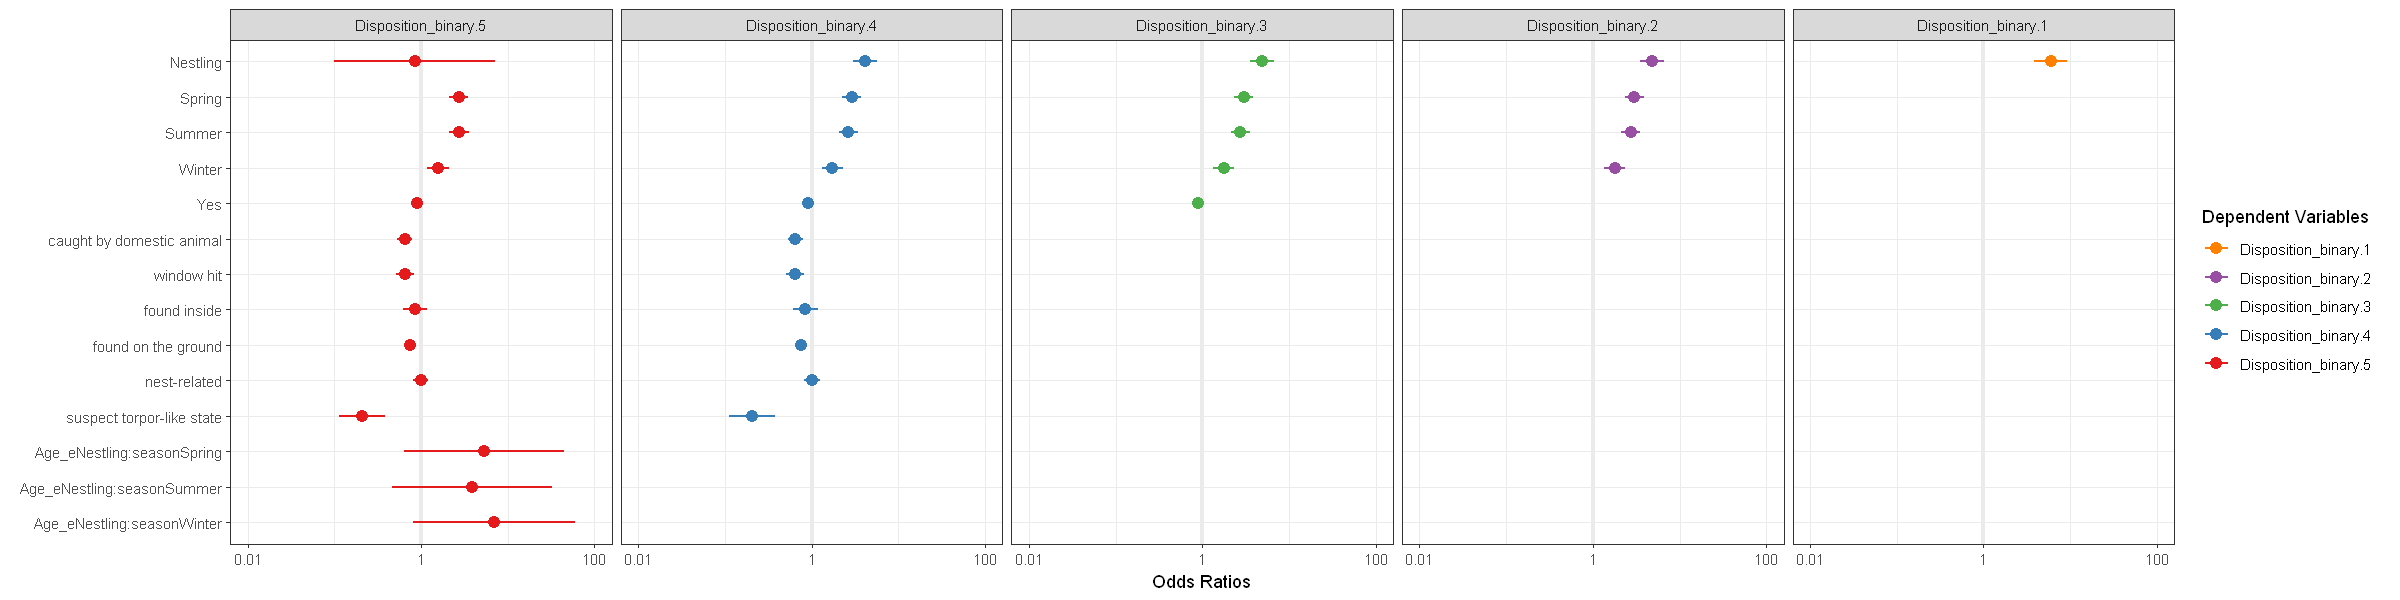

In [43]:
library(repr)
options(repr.plot.width=20, repr.plot.height=5)
plot_models(m1_ref2, m2_ref2, m3_ref2, m4_ref2,  model_inter_season_ref2, grid = TRUE)

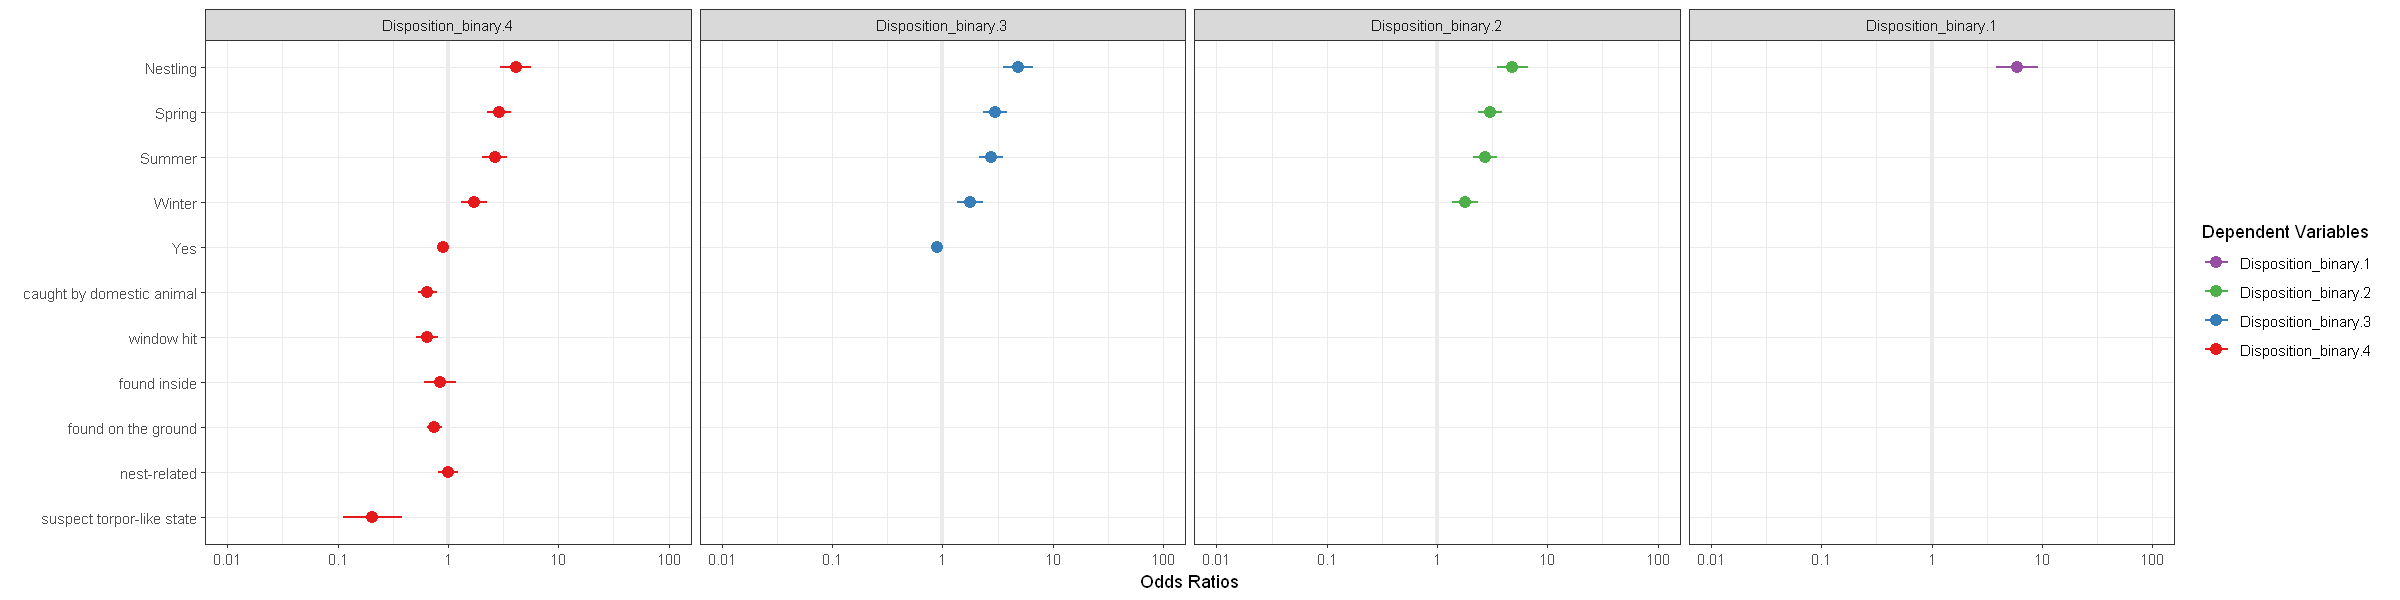

In [44]:
plot_models(m1_ref2, m2_ref2, m3_ref2, m4_ref2,  grid = TRUE)

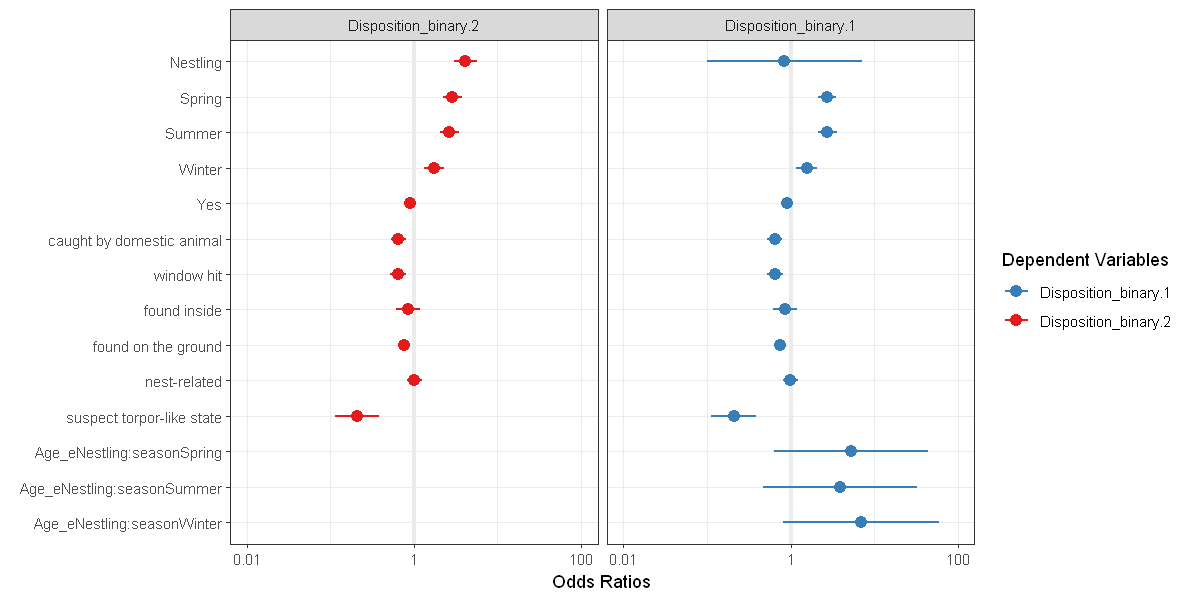

In [45]:
options(repr.plot.width=10, repr.plot.height=5)
plot_models(model_inter_season_ref2, m4_ref2,  grid = TRUE)

[[1]]

[[2]]


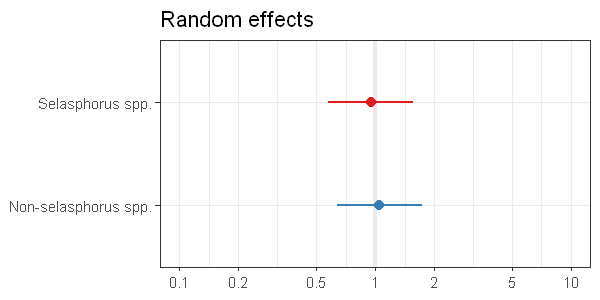

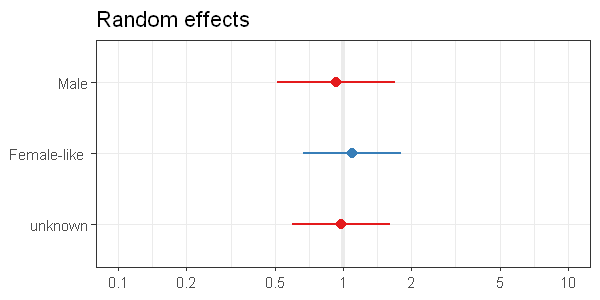

In [46]:
options(repr.plot.width=5, repr.plot.height=2.5)
plot_model(model_inter_season_ref2, type = "re")

[[1]]

[[2]]


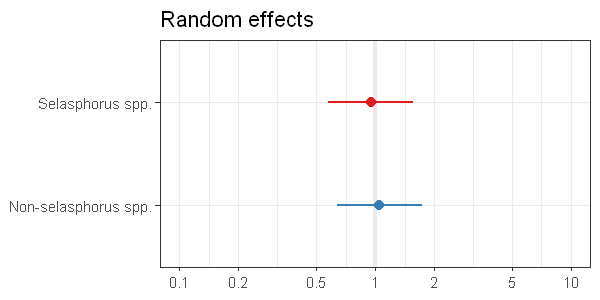

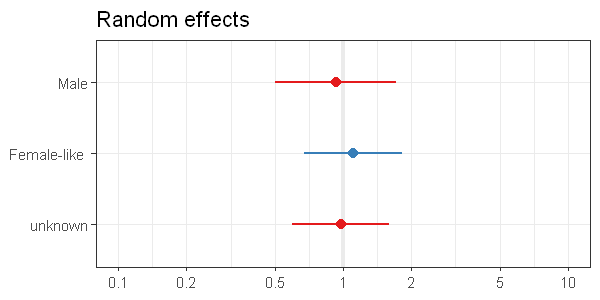

In [47]:
options(repr.plot.width=5, repr.plot.height=2.5)
plot_model(m4_ref2, type = "re")

## Stepwise model selection

In [11]:
m1 <- glmer(Disposition_binary ~ Sex_e +  
            (1|G_O), family="binomial", data)#control = glmerControl(optimizer = "bobyqa"),
m2 <- glmer(Disposition_binary ~ Sex_e +  Age_e +
            (1|G_O), family="binomial", data)#control = glmerControl(optimizer = "bobyqa"),
m3 <- glmer(Disposition_binary ~ Sex_e +  Age_e +  season+ 
            (1|G_O), family="binomial", data)#control = glmerControl(optimizer = "bobyqa"),
m4 <- glmer(Disposition_binary ~ Sex_e + Age_e + season + F_Aid +
            (1|G_O), family="binomial", data)#control = glmerControl(optimizer = "bobyqa"),
m5 <- glmer(Disposition_binary ~ Sex_e + Age_e + season + F_Aid + r +
            (1|G_O), family="binomial", data)#control = glmerControl(optimizer = "bobyqa"),
model_inter_sex_season <- glmer(Disposition_binary ~ Sex_e +  Age_e + season + F_Aid + r +Sex_e*season +(1|G_O), 
                family="binomial", data, control = glmerControl(optimizer = "bobyqa"))

model_inter_season <- glmer(Disposition_binary ~ Sex_e +  
                Age_e + season + F_Aid + r +Age_e*season +(1|G_O), 
                family="binomial", data, control = glmerControl(optimizer = "bobyqa"))


model_inter_Aid_Age <- glmer(Disposition_binary ~ Sex_e +  
                Age_e + season + F_Aid + r +Age_e*F_Aid +(1|G_O), 
                family="binomial", data, control = glmerControl(optimizer = "bobyqa"))

m1_ref <- glmer(Disposition_binary ~ Sex_e +  
            (1|G_O)+ (1 | Age_e), family="binomial", data)#control = glmerControl(optimizer = "bobyqa"),
m2_ref <- glmer(Disposition_binary ~ Sex_e +   season+ 
            (1|G_O)+ (1 | Age_e), family="binomial", data)#control = glmerControl(optimizer = "bobyqa"),
m3_ref <- glmer(Disposition_binary ~ Sex_e + season + F_Aid +
            (1|G_O)+ (1 | Age_e), family="binomial", data)#control = glmerControl(optimizer = "bobyqa"),
m4_ref <- glmer(Disposition_binary ~ Sex_e + season + F_Aid + r +
            (1|G_O)+ (1 | Age_e), family="binomial", data)#control = glmerControl(optimizer = "bobyqa"),
model_inter_sex_season_ref <- glmer(Disposition_binary ~ Sex_e + season + F_Aid + r +Sex_e*season +(1|G_O)+ (1 | Age_e), 
                family="binomial", data, control = glmerControl(optimizer = "bobyqa"))

model_inter_season_ref <- glmer(Disposition_binary ~ Sex_e +  
                + season + F_Aid + r +Age_e*season +(1|G_O)+ (1 | Age_e), 
                family="binomial", data, control = glmerControl(optimizer = "bobyqa"))

model_inter_Aid_Age_ref <- glmer(Disposition_binary ~ Sex_e +  
                season + F_Aid + r +Age_e*F_Aid +(1|G_O)+ (1 | Age_e), 
                family="binomial", data, control = glmerControl(optimizer = "bobyqa"))

boundary (singular) fit: see ?isSingular

boundary (singular) fit: see ?isSingular

boundary (singular) fit: see ?isSingular

boundary (singular) fit: see ?isSingular

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
"unable to evaluate scaled gradient"
Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
"Model failed to converge: degenerate  Hessian with 1 negative eigenvalues"
Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
"unable to evaluate scaled gradient"
Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
"Model failed to converge: degenerate  Hessian with 1 negative eigenvalues"
boundary (singular) fit: see ?isSingular

boundary (singular) fit: see ?isSingular

boundary (singular) fit: see ?isSingular



In [20]:
model_inter_age_sex_season_ref <- glmer(Disposition_binary ~ Sex_e +  
                season + F_Aid + r + Age_e*season + Sex_e*season +(1|G_O)+ (1 | Age_e), 
                family="binomial", data, control = glmerControl(optimizer = "bobyqa"))

fixed-effect model matrix is rank deficient so dropping 2 columns / coefficients

boundary (singular) fit: see ?isSingular



In [12]:
AIC(m1, m2, m3, m4, m5, model_inter_sex_season, model_inter_season, model_inter_Aid_Age,
   m1_ref, m2_ref, m3_ref, m4_ref,model_inter_sex_season_ref, model_inter_season_ref, model_inter_Aid_Age_ref)

,df,AIC
,<dbl>,<dbl>
m1,4,8298.830
m2,5,8280.329
m3,8,8173.363
m4,9,8171.111
m5,15,8126.385
model_inter_sex_season,21,8118.612
model_inter_season,18,8120.446
model_inter_Aid_Age,16,8127.411
m1_ref,5,8298.496


In [13]:
anova(m1, m2, m3, m4, m5, model_inter_sex_season, model_inter_season, model_inter_Aid_Age,
   m1_ref, m2_ref, m3_ref, m4_ref,model_inter_sex_season_ref, model_inter_season_ref, model_inter_Aid_Age_ref)

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m1,4,8298.830,8326.191,-4145.415,8290.830,NA,NA,NA
m2,5,8280.329,8314.531,-4135.164,8270.329,20.500686,1,5.960989e-06
m1_ref,5,8298.496,8332.699,-4144.248,8288.496,0.000000,0,1.000000e+00
m3,8,8173.363,8228.087,-4078.682,8157.363,131.133111,3,3.082321e-28
m2_ref,8,8191.502,8246.226,-4087.751,8175.502,0.000000,0,1.000000e+00
m4,9,8171.111,8232.675,-4076.555,8153.111,22.391331,1,2.223755e-06
m3_ref,9,8189.268,8250.832,-4085.634,8171.268,0.000000,0,1.000000e+00
m5,15,8126.385,8228.992,-4048.193,8096.385,74.882465,6,4.058239e-14
m4_ref,15,8142.788,8245.394,-4056.394,8112.788,0.000000,0,1.000000e+00


# Generalized mixed model Random effect  = Species and Age

In [14]:
print (summary(model_inter_sex_season_ref),correlation=TRUE)
se <- sqrt(diag(vcov(model_inter_sex_season_ref)))
# table of estimates with 95% CI
(tab <- cbind(Est = fixef(model_inter_sex_season_ref), LL = fixef(model_inter_sex_season_ref) - 1.96 * se, UL = fixef(model_inter_sex_season_ref) + 1.96 *
    se))
## Odds
print (exp(tab))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Disposition_binary ~ Sex_e + season + F_Aid + r + Sex_e * season +  
    (1 | G_O) + (1 | Age_e)
   Data: data
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
  8135.0   8278.6  -4046.5   8093.0     6887 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.5921 -0.6650 -0.5052  0.7761  4.7564 

Random effects:
 Groups Name        Variance Std.Dev.
 G_O    (Intercept) 0.01086  0.1042  
 Age_e  (Intercept) 2.82721  1.6814  
Number of obs: 6908, groups:  G_O, 2; Age_e, 2

Fixed effects:
                               Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    -3.49603    1.62820  -2.147 0.031779 *  
Sex_eFemale-like                3.50281    1.74854   2.003 0.045148 *  
Sex_eMale                       3.95828    1.75657   2.253 0.024233 *  
seasonSpring                    2.68


Correlation of fixed effects could have been required in summary()




Correlation of Fixed Effects:
                (Intr) Sx_Fm- Sex_Ml ssnSpr ssnSmm ssnWnt F_AdYs rcgbda rwndwh
Sex_eFml-lk     -0.644                                                        
Sex_eMale       -0.640  0.988                                                 
seasonSprng     -0.517  0.464  0.461                                          
seasonSummr     -0.514  0.459  0.456  0.993                                   
seasonWintr     -0.507  0.453  0.450  0.980  0.979                            
F_AidYes        -0.007 -0.006 -0.006  0.002  0.002  0.002                     
rcghtbydmsa     -0.012 -0.018 -0.015 -0.007 -0.009 -0.007 -0.035              
rwindow hit     -0.008 -0.017 -0.019 -0.011 -0.013 -0.010  0.000  0.380       
rfoundinsid     -0.006 -0.013 -0.011 -0.007 -0.008 -0.005 -0.013  0.268  0.249
rfndonthgrn     -0.013 -0.016 -0.017 -0.026 -0.031 -0.022 -0.112  0.557  0.489
rnestrelatd     -0.004 -0.027 -0.028 -0.031 -0.030 -0.035 -0.048  0.403  0.323
rsspctrpr-s     -0.00

,Est,LL,UL
(Intercept),-3.49602904,-6.68730140,-0.304756675
Sex_eFemale-like,3.50280621,0.07566393,6.929948499
Sex_eMale,3.95827538,0.51540057,7.401150197
seasonSpring,2.68090855,0.84531945,4.516497645
seasonSummer,2.37883882,0.54053754,4.217140104
seasonWinter,2.39562849,0.53618314,4.255073837
F_AidYes,-0.10734373,-0.22016535,0.005477889
rcaught by domestic animal,-0.43981339,-0.64233037,-0.237296413
rwindow hit,-0.43178024,-0.66094558,-0.202614904
rfound inside,-0.15670170,-0.48573883,0.172335426


                                       Est          LL           UL
(Intercept)                     0.03031753 0.001246642    0.7373028
Sex_eFemale-like               33.20851153 1.078600028 1022.4413214
Sex_eMale                      52.36693512 1.674309045 1637.8672163
seasonSpring                   14.59835060 2.328721616   91.5145197
seasonSummer                   10.79236372 1.716929529   67.8391935
seasonWinter                   10.97509361 1.709469586   70.4620197
F_AidYes                        0.89821688 0.802386113    1.0054929
rcaught by domestic animal      0.64415662 0.526065070    0.7887575
rwindow hit                     0.64935206 0.516362839    0.8165926
rfound inside                   0.85495905 0.615242471    1.1880763
rfound on the ground            0.75668169 0.646616247    0.8854822
rnest related                   0.98639698 0.800312460    1.2157489
rsuspect torpor-like state      0.20876852 0.113232954    0.3849082
Sex_eFemale-like :seasonSpring  0.21992387 0.034

In [15]:
write.csv(exp(tab), 'C:/Users/Falco/Desktop/directory/Humminbird_rescue/Outputs/glmer_speciesRaEF.csv')

In [16]:
simo=simulate(model_inter_sex_season_ref, nsim = 10000)
dim(simo)
#Simdat=data
#Simdat$Disposition_binary_sim=rowMeans(simo)

[1]  6908 10000

In [16]:
#model_3_ran_ef <- glmer(Disposition_binary ~ Age_e + Sex_e +  
#                season + F_Aid + r + (1|G_O) + (1 | Age_e), 
#                family="binomial", data, control = glmerControl(optimizer = "bobyqa"))

#print (summary(model_3_ran_ef),correlation=TRUE)
#se <- sqrt(diag(vcov(model_3_ran_ef)))
# table of estimates with 95% CI
#(tab <- cbind(Est = fixef(model_3_ran_ef), LL = fixef(model_3_ran_ef) - 1.96 * se, UL = fixef(model_3_ran_ef) + 1.96 *
#    se))
## Odds
#print (exp(tab))

# Generalized mixed model Random effect  = Species

## Trial run 2

In [14]:
#model1 <- glmer(Disposition_binary ~ Sex_e +  
#                Age_e + season + F_Aid + r + (1|G_O), 
#                family="binomial", data, control = glmerControl(optimizer = "bobyqa"))

#print (summary(model1))
#se <- sqrt(diag(vcov(model1)))
# table of estimates with 95% CI
#(tab <- cbind(Est = fixef(model1), LL = fixef(model1) - 1.96 * se, UL = fixef(model1) + 1.96 *
#    se))
## Odds
#print (exp(tab))

In [9]:
#model1 <- glmer(Disposition_binary ~ Sex_e +  
#                Age_e + Brought_in_after + season + F_Aid + r + (1|G_O), 
#                family="binomial", data)#control = glmerControl(optimizer = "bobyqa"),
#
#print (summary(model1))
#se <- sqrt(diag(vcov(model1)))
# table of estimates with 95% CI
#(tab <- cbind(Est = fixef(model1), LL = fixef(model1) - 1.96 * se, UL = fixef(model1) + 1.96 *
#    se))
## Odds
#print (exp(tab))

## Original run

In [10]:
#any(is.na(data$Brought_in_after))

In [15]:
#model1 <- glmer(Disposition_binary ~ Sex_e +  
#                Age_e + season + F_Aid + r + (1|G_O), 
#                family="binomial", data)#control = glmerControl(optimizer = "bobyqa"),

#print (summary(model1))
#se <- sqrt(diag(vcov(model1)))
# table of estimates with 95% CI
#(tab <- cbind(Est = fixef(model1), LL = fixef(model1) - 1.96 * se, UL = fixef(model1) + 1.96 *
#    se))
## Odds
#print (exp(tab))

In [12]:
#model1 <- glmer(Disposition_binary ~ Sex_e +  
#                Age_e + Brought_in_after + season + F_Aid + r + (1|G_O), 
#                family="binomial", data)#control = glmerControl(optimizer = "bobyqa"),
#
#print (summary(model1))
#se <- sqrt(diag(vcov(model1)))
# table of estimates with 95% CI
#(tab <- cbind(Est = fixef(model1), LL = fixef(model1) - 1.96 * se, UL = fixef(model1) + 1.96 *
#    se))
## Odds
#print (exp(tab))

In [13]:
#model1 <- glmer(Disposition_binary ~ Sex_e +  
#                Age_e + Brought_in_after + season + F_Aid + r + (1|G_O), 
#                family="binomial", data)#control = glmerControl(optimizer = "bobyqa"),

#print (summary(model1))
#se <- sqrt(diag(vcov(model1)))
# table of estimates with 95% CI
#(tab <- cbind(Est = fixef(model1), LL = fixef(model1) - 1.96 * se, UL = fixef(model1) + 1.96 *
#    se))
## Odds
#print (exp(tab))

In [ ]:
#model_inter_season_withagesex <- glmer(Disposition_binary ~ Sex_e +  
#                Age_e + season + F_Aid + r +Age_e*season+ Sex_e*season +(1|G_O), 
#                family="binomial", data, control = glmerControl(optimizer = "bobyqa"))

#print (summary(model_inter_season_withagesex))
#se <- sqrt(diag(vcov(model_inter_season_withagesex)))
# table of estimates with 95% CI
#(tab <- cbind(Est = fixef(model_inter_season_withagesex), LL = fixef(model_inter_season_withagesex) - 1.96 * se, UL = fixef(model_inter_season_withagesex) + 1.96 *
#    se))
## Odds
#print (exp(tab))

In [26]:
#head(Simdat)

"""
options(repr.plot.width=8, repr.plot.height=6)
p <-ggplot(Simdat, aes(y=Disposition_binary, x=Disposition_binary_sim, color=Species_e)) +
    geom_point()+ theme_economist()+
    geom_smooth(method=lm, se=TRUE,aes(fill=Species), alpha=0.5, show.legend = FALSE)+
    ylab("actual disposition") +
    xlab("predicted disposition") +
    scale_x_discrete(limits=c(0, 1))+
    #scale_x_discrete(limits=c(0, 1))+
    ggtitle("Host plasticity of viruses", subtitle='model simulation results')+
    theme(axis.title = element_text(size = 12, face = "italic"),
          axis.text.x=element_text(angle=90),
          legend.text=element_text(size=9, face = "bold.italic"),
          legend.position="right",
          legend.title=element_blank(),
          plot.title = element_text(size=16,family="Times New Roman"))
#ggsave(filename="C:/Users/Falco/Desktop/directory/Interface_analysis/outputs/model_fitness.jpg", plot=p, width = 8, height = 6, dpi = 1000)
p
"""

# GLM model without Random Effect

In [27]:
mod.all_pos<-glm(Disposition_binary ~ Sex_e + G_O + Age_e + Brought_in_after + season + F_Aid+ r, data=data, family="binomial")
summary(mod.all_pos)


Call:
glm(formula = Disposition_binary ~ Sex_e + G_O + Age_e + Brought_in_after + 
    season + F_Aid + r, family = "binomial", data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5673  -0.8636  -0.6901   0.9801   2.4176  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -1.906e+00  1.398e-01 -13.628  < 2e-16 ***
Sex_eMale                  -2.611e-01  9.706e-02  -2.690 0.007135 ** 
Sex_eunknown               -1.284e+01  1.676e+02  -0.077 0.938916    
G_OSelasphorus spp.        -1.607e-01  7.354e-02  -2.185 0.028887 *  
Age_eNestling               1.412e+01  1.676e+02   0.084 0.932854    
Brought_in_after           -3.333e-04  7.892e-04  -0.422 0.672762    
seasonSpring                1.064e+00  1.283e-01   8.290  < 2e-16 ***
seasonSummer                9.750e-01  1.310e-01   7.445 9.70e-14 ***
seasonWinter                5.450e-01  1.421e-01   3.834 0.000126 ***
F_AidYes                   -1.0

In [28]:
Odds = cbind.data.frame(1-exp(coef(mod.all_pos)), 1-exp(coef(mod.all_pos)+ 1.96*summary(mod.all_pos)$coefficients[,2] ), 
                 1-exp(coef(mod.all_pos)- 1.96*summary(mod.all_pos)$coefficients[,2] ))
colnames(Odds) <- c("Odds", "upper limit", "lower limit")
Odds

,Odds,upper limit,lower limit
,<dbl>,<dbl>,<dbl>
(Intercept),8.513083e-01,8.044178e-01,0.88695679
Sex_eMale,2.298131e-01,6.843965e-02,0.36323201
Sex_eunknown,9.999974e-01,-1.238728e+137,1.00000000
G_OSelasphorus spp.,1.484470e-01,1.641305e-02,0.26275716
Age_eNestling,-1.358423e+06,-6.370489e+148,1.00000000
Brought_in_after,3.332565e-04,-1.214189e-03,0.00187831
seasonSpring,-1.896750e+00,-2.724983e+00,-1.25267067
seasonSummer,-1.651152e+00,-2.426980e+00,-1.05096212
seasonWinter,-7.246194e-01,-1.278667e+00,-0.30528603


In [29]:
write.csv(Odds, file = "GLM_full_data.csv")

In [30]:
simo=simulate(mod.all_pos, nsim = 1000)
dim(simo)

[1] 6908 1000

In [32]:
levels(data$Species)

[1] "ANHU"            "BCHU"            "Non-selasphorus" "Selasphorus"

In [33]:
#simo

## Glmulti

In [7]:
#library(rJava)
library(glmulti)

Loading required package: rJava



In [8]:
complete = data[complete.cases(data), ]
dim(complete)

[1] 6908   11

In [ ]:
glmulti.lm.out <-
    glmulti(Disposition_binary ~ Sex_e + Age_e + Brought_in_after + season + F_Aid + r , data = complete,
            level = 2,               # No interaction considered 1 = only main effects, 2 = all pairwise interactions
            method = "g",            # Exhaustive approach
            crit = "aic",            # AIC as criteria
            confsetsize = 5,         # Keep 5 best models
            plotty = F, report = F,  # No plot or interim reports
            fitfunction = "glm", 
            family = "binomial")      # lm function

## Show 5 best models (Use @ instead of $ for an S4 object)
glmulti.lm.out@formulas

TASK: Genetic algorithm in the candidate set.
Initialization...
Algorithm started...


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

glmulti.lm.out <-
    glmulti(Disposition_binary ~ Age_e + (1|G_O),  data = complete,
            level = 2,               # No interaction considered
            method = "h",            # Exhaustive approach
            crit = "aic",            # AIC as criteria
            confsetsize = 5,         # Keep 5 best models
            plotty = F, report = F,  # No plot or interim reports
            fitfunction = "glmer", 
            family = "binomial")      # lm function

## Show 5 best models (Use @ instead of $ for an S4 object)
glmulti.lm.out@formulas

In [37]:
unique(data$season)

[1] Winter Spring Summer Fall  
Levels: Fall Spring Summer Winter

In [37]:
?glmulti